# K-Means: Analyzing Handwritten Digits

This is a project analyzing handwritten digits using the sklearn digits dataset, and the K-means clustering algorithm. It is in part inspired by the CodeCademy project under a similar name, but I wanted to try analyzing the dataset on my own with the algorithm before going through their guided project.

To begin, we will import the dataset and all required packages. We will proceed to look at the data, including its description, some rows, and target columns. Afterwards, we will set up the model, identify the correct number of clusters utilizing inertia and the elbow method, then cluster and look at the output. 

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Load dataset
digits = datasets.load_digits()

# Look at description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

From the description we know that we have 10 different target classes, which should give us our number of clusters (though we will still verify this). We also see that the size of the data is relatively small, with only about 1800 rows, which means we will likely have some error with the model confusing different numbers, such as 1 and 7, or 8 and 3.

In [3]:
# Use a dataframe to analyze a few rows
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
# And analyze the targets  using pandas
digits_df['target'] = digits.target
digits_df['target'].value_counts()

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

We see that our targets are of uniform distribution, and from the first few rows of the data, we see that they correspond to the black/white color intensity of each of the 64 pixels in each image.

Now we begin clustering. First we determine that 10 clusters is indeed the optimal number.

In [5]:
# Create model
model = KMeans(n_clusters = 10, random_state = 1)
model.fit(digits.data)
print(model.inertia_)

1195038.8244622778


While this inertia value looks high, we really don't have a frame of reference to compare to. Let's look at inertia of 2 to 20 clusters and see what happens.

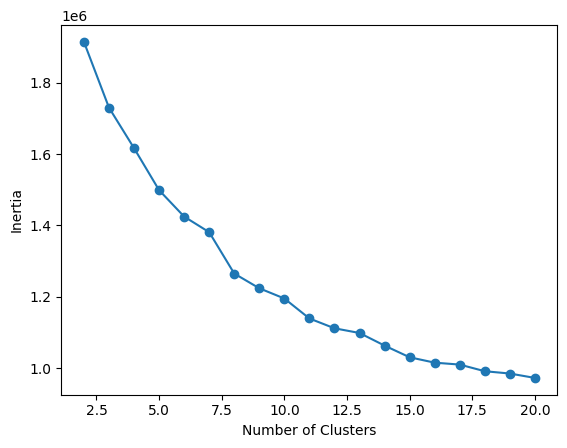

In [6]:
# Initial lists
num_clusters = list(range(2, 21))
inertias = []

# Find inertia of each clustering
for k in num_clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(digits.data)
    inertias.append(model.inertia_)

# Create a graph of number of clusters vs inertia
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

Inertia measures the average distance between points and their centroid within the clustering, so it should always decrease with more clusters. However, we still want to keep the number of clusters low if possible, as too many clusters can cause overfitting. The elbow method states that the best number of clusters is the point at which we see an 'elbow' in the above graph, or where the inertia begins to decrease much more slowly. This appears to happen somewhere around 8-11 clusters. 

As we said before, with such a small dataset, we expect some overlap of the values, so getting a range of possible values does make sense. But since 10 clusters falls within this optimal range, and given what we know of the data, we can safely assume that 10 is an optimal number of clusters.

Using this information, we now look at what this clustering looks like. We continue to keep random_state = 1 consistent throughout this notebook, but any random_state value should work.

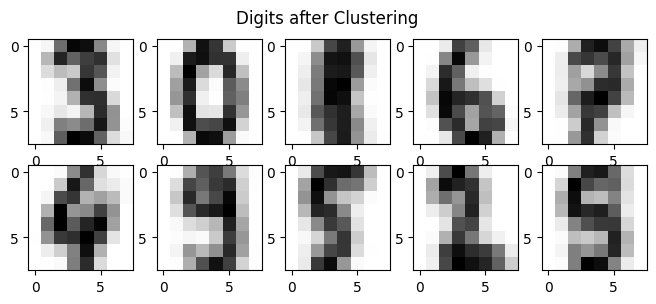

In [7]:
# Refit model for 10 clusters
model = KMeans(n_clusters = 10, random_state = 1)
model.fit(digits.data)

# Setup graph to observe clustering
fig = plt.figure(figsize = (8, 3))
fig.suptitle('Digits after Clustering')
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

We see that most of the numbers are pretty well clustered, and the only issues appeares to be an overlap between 5 and 8 in the last image. With more data points, this would likely work itself out.

# Conclusion

Overall the model did pretty well at analyzing and clustering the 10 digits from each other. While there was one hiccup splitting 5 and 8 properly, this is well within reason with such a simple model on a small set. If we look at more random states, we would observe that other numbers tend to get confused as well, and this issue could very likely be fixed by using a larger dataset.

Some further work we could do with this project is:
<ul>
    <li>Add our own handwritten digits to see how the algorithm classifies them.</li>
    <li>Find more digit datasets and test our theory that the algorithm performs much better with larger datasets</li>
    <li>Assign a label to each cluster, then compare K-Means to a supervised algorithm and see which one performs better.</li>
</ul>